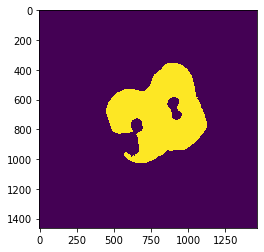

In [21]:
#Edge detection
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("abc.TIF")
shifted = cv2.pyrMeanShiftFiltering(image, 21, 96)
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

In [ ]:
rows, cols = thresh.shape
sobel_horizontal = cv2.Sobel(thresh, cv2.CV_64F, 1, 0, ksize=31)
sobel_vertical = cv2.Sobel(thresh, cv2.CV_64F, 0, 1, ksize=31)
plt.imshow(sobel_horizontal)
plt.imshow(sobel_vertical)

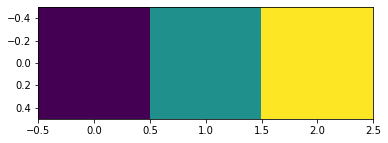

In [4]:
plt.imshow([[-1,0,1]])

In [5]:
a = []
b = [2,2]
c = [1,1]
a.append(b)
a.append(c)
a[0]

[2, 2]

In [6]:
def rem_dup(duplicate):#function to remove duplicate list entries
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list

In [22]:
#Vertical closed column detection using look-ahead
coords_ver = []
col_trios = []#representing [rowstrrtin, row ending, column] of closed curve
c = 700
hole_found = False
while c < 1500:
    #print("c")
    r = 700
    while r < 1500:
        #print("r")
        #print(sobel_vertical[r][c])
        if sobel_vertical[r][c] < 0 :
            r_dash = r
            #print("looking ahead")
            while r_dash < 1700:
                if sobel_vertical[r_dash][c] > 0:
                    #print("hole found!")
                    col_trios.append([r, r_dash, c])
                    hole_found = True
                    break
                r_dash+=1    
        
        r+=1
    c+=1
print("hole search finished!")
col_trios = rem_dup(col_trios)
for trio in col_trios:
    row = trio[0]
    while row < trio[1]:
        coords_ver.append([row, trio[2]])
        row+=1
print(len(coords_ver))

hole search finished!
775107


In [23]:
#Horizontal closed rows detection using look-ahead
coords_hor = []
row_trios = []#representing [row , column strarting, column ending] of closed curve
r = 100
hole_found = False
while r < 1700:
    #print("r")
    c = 500
    while c < 1700:
        #print("c")
        #print(sobel_horizontal[r][c])
        if sobel_horizontal[r][c] < 0 :
            c_dash = c
            #print("looking ahead")
            while c_dash < 1700:
                if sobel_horizontal[r][c_dash] > 0:
                    #print("hole found!")
                    row_trios.append([r, c, c_dash])
                    hole_found = True
                    break
                c_dash+=1    
        c+=1
    r+=1
print("hole search finished!")
row_trios = rem_dup(row_trios)
for trio in row_trios:
    col = trio[1]
    while col < trio[2]:
        coords_hor.append([trio[0], col])
        col+=1
print(len(coords_hor))

hole search finished!
1089876


In [30]:
#intersection of both detected regions
#enclosed_pixels = set(coords_ver).intersection(set(coords_hor)
coords_ver_stuff = set(map(tuple, coords_ver))
enclosed_pixels = [x for x in coords_hor if tuple(x) in coords_ver_stuff]

[932, 1216]

In [52]:
len(enclosed_pixels)
#type(enclosed_pixels)
#enclosed_pixels[0]

577031

In [48]:
print("Slice Volume:")
print(str(len(enclosed_pixels)*1.72*72*14/1000000000)+" mm^3")

Slice Volume:
1.00043326656mm^3


abc
(2516, 2516)


'\ni = 700\nwhile i<800:\n    j = 700\n    while j<800:\n        if [i,j] in enclosed_pixels:\n            canvas[i,j] = 1;\n        j+=1\n    i+=1    \nplt.imshow(canvas)\n'

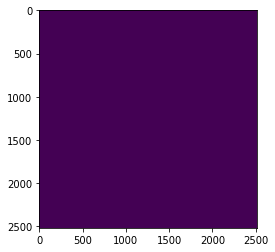

In [56]:
canvas = np.zeros([len(thresh), len(thresh)])
print("abc")
print(canvas.shape)
plt.imshow(canvas)
"""
i = 700
while i<800:
    j = 700
    while j<800:
        if [i,j] in enclosed_pixels:
            canvas[i,j] = 1;
        j+=1
    i+=1    
plt.imshow(canvas)
"""

In [6]:
cv2.THRESH_OTSU

8